In [149]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import geopandas as gpd
# import geoplot as gpltf
from geoviews import dim

gpd.datasets.available

df = pd.read_csv('../../../final_parsed_malt_data_cleaned.csv')
df.head()

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,vince huguet,No profile image,Webdesigner,-,499,1.00,1h,['Webdesigner'],['Design'],0,...,Je vous dis bonjour.,0,0,0,vincehuguet,https://www.malt.fr/profile/vincehuguet,2013-02-26,Paris,île-de-france,2013-02-26
1,Stanislas Blaineau,https://dam.malt.com/fgvxeyh2zekvtqqrfbis?grav...,développeur php symphony 2/3/4 - full stack,8-15,400,0.91,4h,"['Développeur Web Back-end', 'Développeur Web ...","['symfony 2/3/4', 'MySQL', 'jQuery', 'Bootstra...",0,...,"Développeur web full-stack PHP depuis 2012, j'...",2,0,0,stanislasblaineau,https://www.malt.fr/profile/stanislasblaineau,2013-09-23,Lyon,auvergne-rhône-alpes,2013-09-23
2,Laura Ferron,https://dam.malt.com/rhqcv7lqrx2p8ujw2bok?grav...,Product designer Senior - UX / UI - Figma,8-15,400,1.00,1h,"['UI Designer', 'UX Designer']","[""design d'interface mobile"", 'Webdesign', 'Us...",1,...,Besoin d'une aide graphique pour un nouveau pr...,18,0,0,lauraferron,https://www.malt.fr/profile/lauraferron,2014-01-18,Paris,île-de-france,2014-01-18
3,Loïc B.,No profile image,DA Web / Chef de projets,-,300,1.00,1h,['Product Manager'],"['E-commerce', 'Wordpress', 'Prestashop', 'Ado...",0,...,Après plusieurs années en agence ( création de...,0,0,0,loicbel,https://www.malt.fr/profile/loicbel,2013-05-22,Toulouse,occitanie,2013-05-22
4,Philippe De Cuzey,https://dam.malt.com/vbjgjtuddc6dxgbk28qj?grav...,data engineer senior,8-15,750,0.50,2h,['Data Engineer'],"['Python', 'Spark', 'SQL', 'noSQL', 'Apache Ka...",0,...,"free lance data engineer, working on Big Data ...",1,0,0,philippedecuzey,https://www.malt.fr/profile/philippedecuzey,2014-01-16,Paris,île-de-france,2014-01-16


# Top 5 Highest Paid Regions by Average

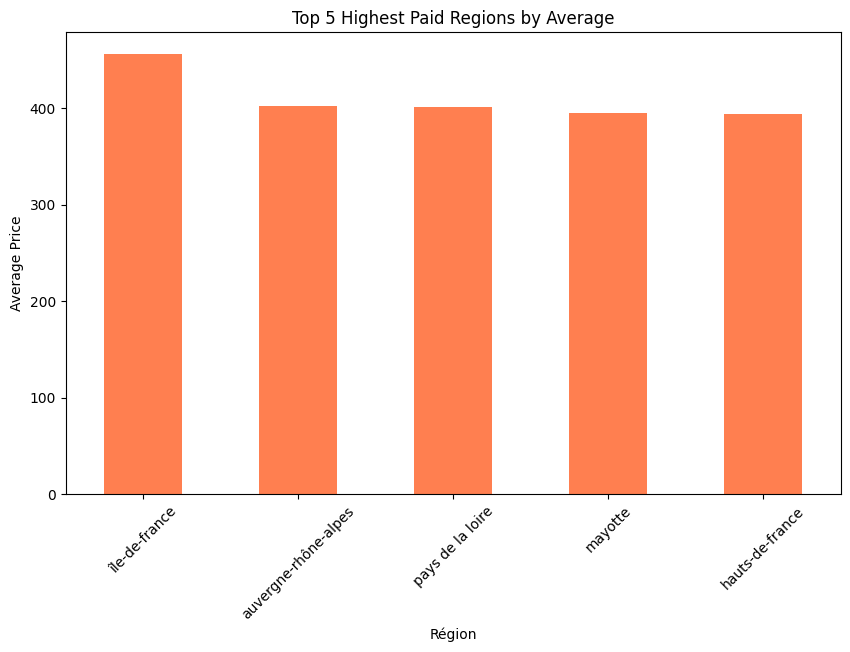

In [150]:
# Group by region and calculate price averaging
region_mean = df.groupby('Region_Name')['price'].mean().sort_values(ascending=False)

# Select the top 5 regions
top_5_regions = region_mean.head(5)


plt.figure(figsize=(10, 6))
top_5_regions.plot(kind='bar', color='coral')
plt.title('Top 5 Highest Paid Regions by Average')
plt.xlabel('Région')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [151]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from math import pi

# # Function to process experience values
# def process_experience(value):
#     if pd.isnull(value) or value == '-':
#         return np.nan
#     try:
#         # Check if the value is a range
#         if '-' in value:
#             low, high = value.split('-')
#             return (float(low) + float(high)) / 2
#         # Check if the value ends with 'et+' which indicates a minimum value
#         elif value.endswith('et+'):
#             return float(value.rstrip('et+'))
#         # Otherwise, convert the value to float directly
#         else:
#             return float(value)
#     except ValueError:
#         return np.nan

# # Load the dataset
# file_path = '../../final_parsed_malt_data_cleaned .csv'
# df = pd.read_csv(file_path)

# # Apply the function to the 'experience' column
# df['experience'] = df['experience'].apply(process_experience)

# # Convert 'missions' and 'supermalter' to numeric types
# df['missions'] = pd.to_numeric(df['missions'], errors='coerce')
# df['supermalter'] = pd.to_numeric(df['supermalter'], errors='coerce')

# # Group by 'Region_Name' and calculate the required metrics
# missions_by_region = df.groupby('Region_Name')['missions'].sum()
# experience_by_region = df.groupby('Region_Name')['experience'].mean()
# supermalters_by_region = df.groupby('Region_Name')['supermalter'].sum()

# # Combine the metrics into a single DataFrame
# comparison_df = pd.DataFrame({
#     'Missions': missions_by_region,
#     'Experience': experience_by_region,
#     'Supermalters': supermalters_by_region
# }).reset_index()

# # Normalize the metrics to use in the radar chart
# normalized_df = comparison_df.drop('Region_Name', axis=1).apply(lambda x: x / x.max(), axis=0)

# # The plot is made circular, so we need to complete the loop
# normalized_df = pd.concat([normalized_df, normalized_df.iloc[:, 0:1]], axis=1)

# # Number of variables we're plotting
# num_vars = len(normalized_df.columns)

# # Split the circle into even parts and save the angles so we know where to put each axis
# angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
# angles += angles[:1]  # Complete the loop

# # Plot
# fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# # Draw one axe per variable and add labels
# labels = comparison_df.columns.drop('Region_Name').tolist()
# labels += labels[:1]  # Ensure the labels complete the loop
# ax.set_thetagrids(np.degrees(angles), labels)

# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks(color="grey", size=7)
# plt.ylim(0, 1)

# # Plot each region's values on the radar chart
# for idx, row in comparison_df.iterrows():
#     data = row.drop('Region_Name').tolist()
#     data += data[:1]  # Complete the loop
#     ax.plot(angles, data, linewidth=1, linestyle='solid', label=row['Region_Name'])

# # Add a legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# plt.show()


In [159]:
region_data = df['Region_Name'].value_counts().sort_values(ascending=False)
Region_Frame = pd.DataFrame({'region_name': region_data.index, 'occurrence': region_data.values})
Region_Frame

,region_name,occurrence
0,île-de-france,91205
1,auvergne-rhône-alpes,18022
2,occitanie,12555
3,provence-alpes-côte d'azur,11003
4,nouvelle-aquitaine,10954
5,hauts-de-france,7980
6,pays de la loire,7283
7,grand est,6436
8,bretagne,5005
9,normandie,3086


In [170]:
# geo_france = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")

geo_france = gpd.read_file("../../../regions.geojson")
# change column name nom to region_name
geo_france.rename(columns={'nom': 'region_name'}, inplace=True)
# change region_name to lowercase
geo_france['region_name'] = geo_france['region_name'].str.lower()
geo_france.head(80)

,code,region_name,geometry
0,11,île-de-france,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ..."
1,24,centre-val de loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,27,bourgogne-franche-comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ..."
3,28,normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
4,32,hauts-de-france,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."
5,44,grand est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
6,52,pays de la loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46..."
7,53,bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48..."
8,75,nouvelle-aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45..."
9,01,guadeloupe,"MULTIPOLYGON (((-61.63356 15.83977, -61.64798 ..."


In [174]:
merged = geo_france.merge(Region_Frame, on='region_name')
merged_rows_droped = merged.drop([9,10,11,12,13])
merged

,code,region_name,geometry,occurrence
0,11,île-de-france,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",91205
1,24,centre-val de loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",2266
2,27,bourgogne-franche-comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",2580
3,28,normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",3086
4,32,hauts-de-france,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",7980
5,44,grand est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",6436
6,52,pays de la loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",7283
7,53,bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",5005
8,75,nouvelle-aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",10954
9,01,guadeloupe,"MULTIPOLYGON (((-61.63356 15.83977, -61.64798 ...",84


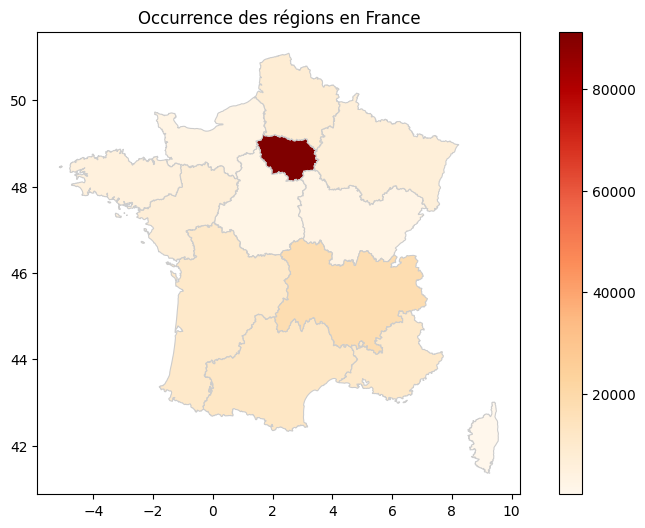

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


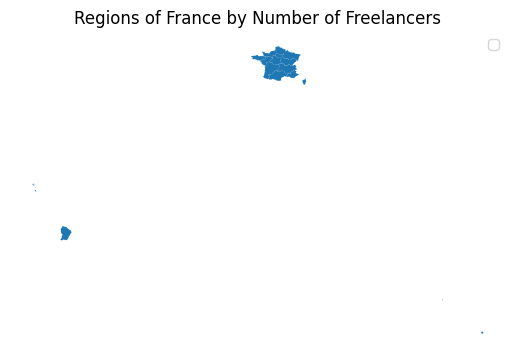

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [175]:
# Visualiser la carte avec les fréquences des régions
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_rows_droped.plot(column='occurrence', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Occurrence des régions en France')
plt.show()

geo_france.plot()
plt.title('Regions of France by Number of Freelancers')
plt.axis('off')
plt.legend()
plt.show()

geo_france.crs

In [185]:
cat = df['categories']
categories_data = cat.value_counts().sort_values(ascending=False)
categories_data.head()

Series([], Name: count, dtype: int64)